# Week 5: Arrays and Plotting in Python

*February 15, 2023*

**Today, we'll be talking about:**

- How machines (computers) represent numeric data, including how the different types of numeric data (integers, decimals) are stored. This is important for proper handling of numeric data and NoData values.
- We'll talk about how to combine and reshape NumPy arrays, e.g., `arr.reshape()`, `np.stack()`, `np.vstack()`, `np.hstack()`, and `np.concatenate()`.
- We'll introduce `matplotlib` and the plotting tool `matplotlib.pyplot()`.

In [1]:
import numpy as np

numbers = np.arange(0, 10)
numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
# Method of an array
# Every array has a min, max, mean, and standard deviation function
numbers.std()

2.8722813232690143

In [3]:
numbers = np.arange(0, 10).reshape((2, 5))
numbers

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [4]:
# We can take the mean of each row
numbers.mean(axis = 1)

array([2., 7.])

In [13]:
# np.nanmax, nanmin, nanmean or nanstd can be called when there are NaN values that you want to ignore
numbers2 = np.arange(0.0, 10.0).reshape((2, 5))
numbers2[1,1] = np.nan
numbers2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5., nan,  7.,  8.,  9.]])

In [15]:
np.nanstd(numbers2, axis = 1)

array([1.41421356, 1.47901995])

## How Machines Represent Numbers

There are 8 binary digits here.

$$
\begin{array}{cccccccc}
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0
\end{array}
$$

Each digit represents a power of 2, *from the largest power (at the left) to the smallest power (at the right).* The way that machines store the decimal number 4 using these digits is by computing:

$$
4 = (0\times 2^7) + (0\times 2^6) + (0\times 2^5) + (0\times 2^4) + (0\times 2^3) + (1\times 2^2) + (0\times 2^1) + (0\times 2^0)
$$

Which reduces to:

$$
4 = (1\times 2^2)
$$

Hence, the binary representation of 5 is:

$$
5 = \cdots + (1\times 2^2) + (0\times 2^1) + (1\times 2^0)
$$

And therefore we would write:

$$
\begin{array}{cccccccc}
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1
\end{array}
$$


![](radres.jpg)

---

## Challenge: Limits of Binary Representations

**What's the biggest positive integer that can be represented as a signed, 16-bit integer? What about an *unsigned* 16-bit integer?**

How do those two numbers compare?

In [17]:
# Store an array of the products of 1 * 2^x where x \in w_(1, 16)
powers = 2 ** np.arange(0, 16)
powers.sum()

65535

In [21]:
# The BELOW illustrates that you can save computational costs
# when working with large datasets by reducing the byte size of
# your numerical data, depending on the precision you need.

In [18]:
np.float16(3.14265)

3.143

In [19]:
np.float32(3.14265)

3.14265

---

## Reshaping Arrays

In [22]:
import numpy as np
import pandas as pd

temps = pd.read_csv(
    'http://files.ntsg.umt.edu/data/GIS_Programming/data/NOAA_NCEP_CPC_gridded_deg0p5_1948-2022_Utqiagvik.txt',
    header = None).to_numpy()

In [24]:
temps[0:5]

array([[-27.52, -25.63, -27.88, -16.84, -10.27,  -0.7 ,   4.9 ,   2.36,
         -3.82, -11.5 , -21.82, -30.65],
       [-25.03, -30.53, -21.13, -24.54, -10.32,  -1.22,   4.29,   5.76,
          1.25,  -6.39, -14.48, -24.96],
       [-20.86, -32.76, -24.49, -17.75,  -7.33,   1.49,   5.73,   5.1 ,
          0.2 ,  -7.38, -11.95, -24.37],
       [-33.64, -31.  , -29.5 , -16.93,  -7.17,   1.48,   6.49,   6.01,
          0.07,  -8.25, -12.68, -23.78],
       [-28.22, -32.15, -28.41, -21.64, -10.91,  -0.31,   5.6 ,   3.86,
         -2.31,  -8.29, -14.04, -24.26]])

In [33]:
np.shape(temps)

(75, 12)

In [25]:
year1 = temps[0]
year1

array([-27.52, -25.63, -27.88, -16.84, -10.27,  -0.7 ,   4.9 ,   2.36,
        -3.82, -11.5 , -21.82, -30.65])

In [26]:
year1.shape

(12,)

In [29]:
seasons = year1.reshape((4, 3))
seasons

array([[-27.52, -25.63, -27.88],
       [-16.84, -10.27,  -0.7 ],
       [  4.9 ,   2.36,  -3.82],
       [-11.5 , -21.82, -30.65]])

In [31]:
halves = year1.reshape((6, 2))
halves

array([[-27.52, -25.63],
       [-27.88, -16.84],
       [-10.27,  -0.7 ],
       [  4.9 ,   2.36],
       [ -3.82, -11.5 ],
       [-21.82, -30.65]])

In [36]:
np.shape(temps)

(75, 12)

In [37]:
# If we want to get seasons for all 75 years
# NOTE: You should only combine or break apart ADJACENT AXES!!!
# For example, above you see temps.shape is (75, 12). 
# We can break apart 12. We can combine 3 and 4. But we can't combine 3 and 75.
temps_seasonal = temps.reshape((75, 4, 3))
temps_seasonal

array([[[-27.52, -25.63, -27.88],
        [-16.84, -10.27,  -0.7 ],
        [  4.9 ,   2.36,  -3.82],
        [-11.5 , -21.82, -30.65]],

       [[-25.03, -30.53, -21.13],
        [-24.54, -10.32,  -1.22],
        [  4.29,   5.76,   1.25],
        [ -6.39, -14.48, -24.96]],

       [[-20.86, -32.76, -24.49],
        [-17.75,  -7.33,   1.49],
        [  5.73,   5.1 ,   0.2 ],
        [ -7.38, -11.95, -24.37]],

       [[-33.64, -31.  , -29.5 ],
        [-16.93,  -7.17,   1.48],
        [  6.49,   6.01,   0.07],
        [ -8.25, -12.68, -23.78]],

       [[-28.22, -32.15, -28.41],
        [-21.64, -10.91,  -0.31],
        [  5.6 ,   3.86,  -2.31],
        [ -8.29, -14.04, -24.26]],

       [[-29.13, -30.21, -27.99],
        [-17.24,  -7.22,   2.42],
        [  4.34,   2.33,  -0.57],
        [-11.81, -18.62, -28.01]],

       [[-28.01, -31.81, -23.86],
        [-18.13,  -9.04,   0.68],
        [  4.75,   6.44,   0.76],
        [ -6.63, -16.28, -28.34]],

       [[-24.26, -32.87, -27.55],


In [42]:
# We use temps.T to transpose a 2-axis array
# We need to use np.rollaxis to change where the axes are located.
rolled = np.rollaxis(temps_seasonal, 0, 2)
np.shape(rolled)

(4, 75, 3)

In [43]:
rolled

array([[[-27.52, -25.63, -27.88],
        [-25.03, -30.53, -21.13],
        [-20.86, -32.76, -24.49],
        [-33.64, -31.  , -29.5 ],
        [-28.22, -32.15, -28.41],
        [-29.13, -30.21, -27.99],
        [-28.01, -31.81, -23.86],
        [-24.26, -32.87, -27.55],
        [-28.72, -32.67, -26.33],
        [-20.38, -30.53, -25.67],
        [-26.03, -27.34, -23.94],
        [-27.57, -22.39, -33.05],
        [-28.86, -23.18, -24.79],
        [-22.84, -31.88, -30.  ],
        [-20.94, -21.74, -25.78],
        [-22.14, -26.68, -28.67],
        [-28.38, -32.15, -30.93],
        [-28.54, -33.03, -21.5 ],
        [-27.94, -29.71, -30.51],
        [-25.05, -27.55, -23.29],
        [-23.9 , -31.11, -24.2 ],
        [-26.26, -28.81, -24.99],
        [-26.7 , -26.12, -26.54],
        [-31.04, -32.54, -29.4 ],
        [-28.07, -29.78, -30.39],
        [-27.04, -25.82, -29.33],
        [-25.43, -34.09, -28.78],
        [-31.55, -26.45, -23.22],
        [-27.58, -31.3 , -26.59],
        [-20.8

In [44]:
np.vstack([temps[0], temps[1]]).shape

(2, 12)

In [45]:
np.hstack([temps[0], temps[1]]).shape

(24,)

In [46]:
# If we want to get arrays for the first 3 years:
np.stack([temps[0], temps[1], temps[2]], axis = 1).shape

(12, 3)

Here's a visual explanation:

![](numpy-stacking.png)

---

## Challenge: Manipulating Time Series Arrays

Let's get some practical experience with reshaping, aggregating, and stacking arrays.

**We want to compare the mean seasonal temperatures in Utqiagvik for two periods: 1948-2000 and 2000-2022.** For our purposes, the four (4) seasons are defined:

- Winter: January (month 0, in Python's counting) through March (month 2)
- Spring: April (month 3) through June (month 5)
- Summer: July (month 6) through September (month 8)
- Fall: October (month 9) through December (month 11)

**Using what you've learned so far:**

1. Subset the `temps` array into two arrays, one for each time period, 1948-2000 and 2000-2022.
2. Reshape those arrays so they reflect the four seasons.
3. Average the reshaped arrays, taking the mean temperature for each season.
4. Stack the two arrays back together so they can easily be viewed. *The final shape of the stacked array should be:* `(4, 2)`.

**Hint:** For Step 1, you'll need to figure out the row number(s) in `temps` associated with each year. The rows of `temps` represent years, so an easy way to do that is to create a 1D sequence representing the years, then figure out the numeric position of a year you are interested in:

In [47]:
years = list(range(1948, 2023))
years.index(2000)

52

---

## Plotting with matplotlib

---

## Challenge: Plotting Multiple Datasets

As we've seen, using `matplotlib.pyplot()` is a matter of calling one *or more* `pyplot.*` functions and then, finally, calling `pyplot.show()` when you're ready to see the result.

**Experiment with `pyplot` to find a way to plot:**

- A line plot with two lines: One showing January temperatures (in each year) and one showing July temperatures in each year. The X axis should be the years and the Y axis should be the temperatures.
- A line plot similar to the previous one, but showing January temperature *anomalies* and July temperature *anomalies* as two separate lines.

**Extra challenge:** Try adding a `pyplot.legend()` to these plots!

In [48]:
import matplotlib.pyplot as plt

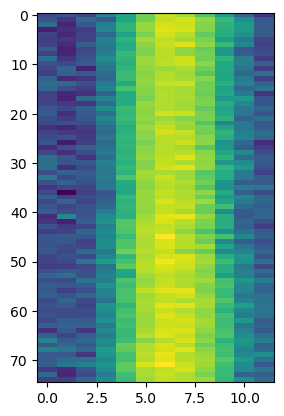

In [50]:
# imshow will plot any 2D array 
plt.imshow(temps, aspect = 1/4)

In [53]:
# Get average temp for each year
annual = temps.mean(axis = 1)
annual

array([-14.11416667, -12.275     , -11.1975    , -12.40833333,
       -13.42333333, -13.47583333, -12.45583333, -14.54416667,
       -14.25083333, -11.965     , -11.7575    , -13.62916667,
       -12.84333333, -13.56      , -11.19166667, -12.0875    ,
       -14.75666667, -12.9475    , -13.39333333, -12.0125    ,
       -12.53666667, -12.5225    , -13.59333333, -14.04416667,
       -12.80333333, -12.22916667, -14.545     , -14.32666667,
       -12.84833333, -11.90416667, -11.62333333, -11.24      ,
       -12.6825    , -11.41333333, -13.1425    , -13.5475    ,
       -14.82583333, -12.68416667, -12.11416667, -12.42833333,
       -13.025     , -11.045     , -12.39833333, -12.865     ,
       -12.47833333, -10.4775    , -12.75083333, -11.45083333,
       -11.77      , -11.22833333,  -9.32083333, -12.25666667,
       -11.6675    , -11.5725    , -10.03833333, -10.465     ,
       -10.59166667, -10.3175    , -10.75416667,  -9.75      ,
       -11.05      , -10.775     , -10.21833333, -10.46

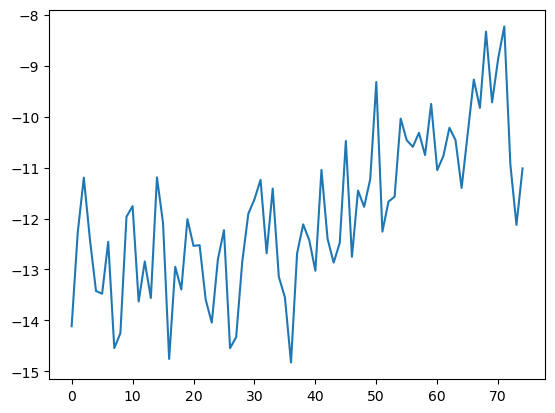

In [55]:
plt.plot(annual)

In [56]:
years = np.arange(1948, 2023)
years.shape

(75,)

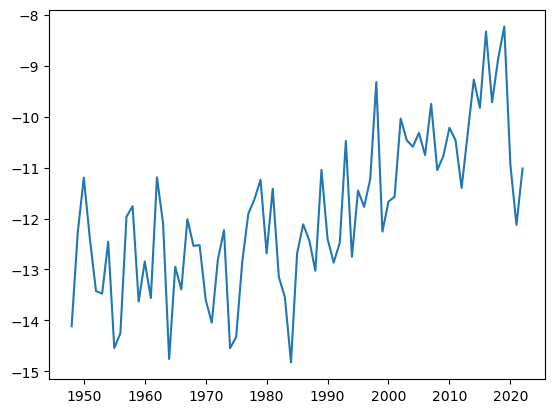

In [57]:
plt.plot(years, annual)

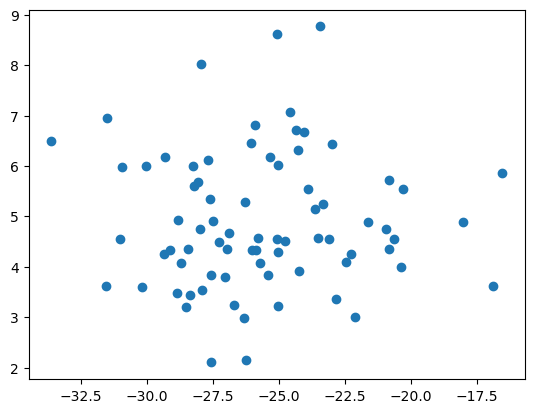

In [58]:
plt.scatter(temps[:,0], temps[:,6])

---

## More Resources

- [Visual introduction to NumPy](https://jmsevillam.github.io/slides/Python/Numpy.slides.html#/)